<h1>Function Approximation with RBF Networks

<h2>Problem Overview :

1. Goal: Approximate a function (e.g., y = sin(x)) using an RBF network.

2. Dataset: Synthetic points from the sine function.

3. Deliverable: True vs predicted curve showing approximation quality.

<h3>Why RBF?

- RBF networks use radial basis functions (like Gaussian functions) in the hidden layer to transform inputs into a space where linear output weights can approximate non-linear functions.

- Think of hidden neurons as “local feature detectors”: each neuron responds strongly to inputs near its center.

<h3>Steps :

1. Generate the dataset: x values and y = sin(x).

2. Initialize RBF centers and widths (σ).

3. Compute hidden layer outputs using the Gaussian RBF:

        ϕi​(x)=exp(−2σi2​∣∣x−ci​∣∣2​)

        where, ci is the center of neuron i.

4. Train output weights using least squares (since RBFs are linear in output weights).

5. Plot true vs predicted curve.

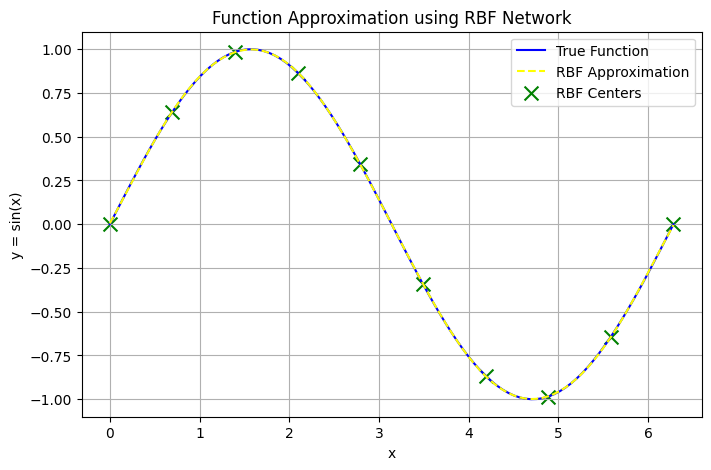

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Generate dataset
# -----------------------------
np.random.seed(42)
X = np.linspace(0, 2*np.pi, 100).reshape(-1,1)
y = np.sin(X)

# -----------------------------
# 2️⃣ RBF Network Parameters
# -----------------------------
num_centers = 10
centers = np.linspace(0, 2*np.pi, num_centers).reshape(-1,1)
sigma = (centers[1] - centers[0]) * 1.5  # width of Gaussian

# -----------------------------
# 3️⃣ Compute RBF activations
# -----------------------------
def rbf(x, c, s):
    return np.exp(-np.linalg.norm(x-c, axis=1)**2 / (2*s**2))

# Build design matrix (hidden layer output)
Phi = np.zeros((X.shape[0], num_centers))
for i, c in enumerate(centers):
    Phi[:,i] = rbf(X, c, sigma)

# -----------------------------
# 4️⃣ Train output weights (Least Squares)
# -----------------------------
# Solve for weights w: Phi @ w = y
W = np.linalg.pinv(Phi) @ y

# -----------------------------
# 5️⃣ Predict
# -----------------------------
y_pred = Phi @ W

# -----------------------------
# 6️⃣ Plot results
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(X, y, label='True Function', color='blue')
plt.plot(X, y_pred, label='RBF Approximation', color='yellow', linestyle='--')
plt.scatter(centers, np.sin(centers), color='green', marker='x', s=100, label='RBF Centers')
plt.title("Function Approximation using RBF Network")
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.legend()
plt.grid(True)
plt.show()
